In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, fbeta_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report


In [3]:
#Loading dataset
credit_data = pd.read_csv('training_data.csv')

In [4]:
credit_data

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0


In [5]:
credit_data.shape

(25247, 27)

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [7]:
credit_data.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

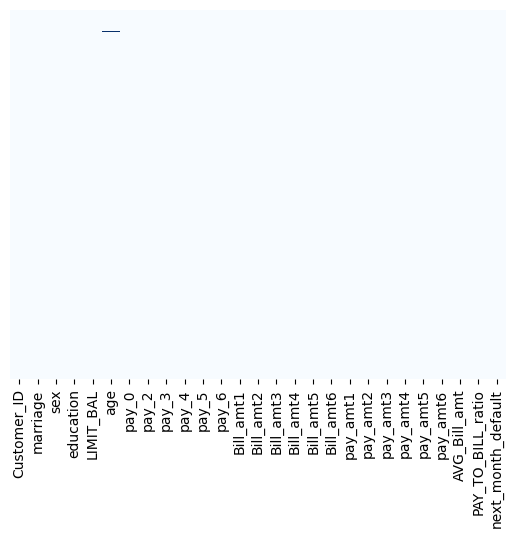

In [8]:
sns.heatmap(credit_data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=credit_data.columns);

In [9]:
sum(credit_data.isna().sum(axis=1) > 0)


126

In [10]:
sum(credit_data.isna().sum(axis=0) > 0)


1

In [11]:
credit_data.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [12]:
# making a feature column
feature_cols = [col for col in credit_data.columns if col not in ['next_month_default', 'Customer_ID']]

In [13]:
# Impute missing values using KNN
knn_imputer = KNNImputer(n_neighbors=5)
credit_data[feature_cols] = knn_imputer.fit_transform(credit_data[feature_cols])

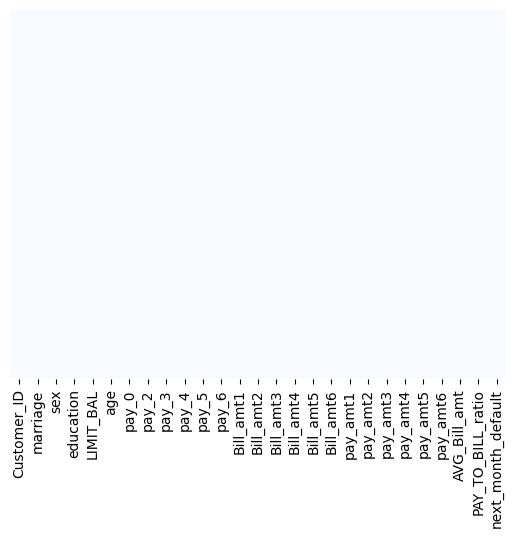

In [14]:
sns.heatmap(credit_data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=credit_data.columns);

In [15]:
# Feature Engineering 
credit_data['avg_pay_amt'] = credit_data[[f'pay_amt{i}' for i in range(1, 7)]].mean(axis=1)
credit_data['total_Bill'] = credit_data[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1)
credit_data['total_pay'] = credit_data[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1)
credit_data['credit_utilization_ratio'] = credit_data['AVG_Bill_amt'] / (credit_data['LIMIT_BAL'] + 1)
credit_data['repayment_ratio'] = credit_data['total_pay'] / (credit_data['total_Bill'] + 1)


In [16]:
import itertools

pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Delay-related features
credit_data['num_delays'] = credit_data[pay_cols].apply(lambda row: sum(row >= 1), axis=1)
credit_data['max_delay'] = credit_data[pay_cols].max(axis=1)


In [17]:
credit_data

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,avg_pay_amt,total_Bill,total_pay,credit_utilization_ratio,repayment_ratio,num_delays,max_delay
0,5017,2.0,0.0,2.0,60000.0,25.0,2.0,2.0,2.0,0.0,...,41511.50,0.03,0,1326.185000,249068.99,7957.11,0.691847,0.031947,3,2.0
1,5018,2.0,1.0,1.0,290000.0,24.0,0.0,0.0,-2.0,-2.0,...,2534.50,0.27,0,674.998333,15210.46,4049.99,0.008740,0.266246,0,0.0
2,5019,1.0,0.0,2.0,180000.0,63.0,0.0,0.0,0.0,0.0,...,50422.00,0.04,0,2009.286667,302530.10,12055.72,0.280121,0.039850,0,0.0
3,5020,1.0,1.0,2.0,210000.0,43.0,0.0,0.0,0.0,0.0,...,86229.50,0.04,0,3074.916667,517378.53,18449.50,0.410615,0.035660,0,0.0
4,5021,2.0,0.0,1.0,280000.0,32.0,-2.0,-2.0,-2.0,-2.0,...,11814.33,0.72,0,8552.366667,70885.52,51314.20,0.042194,0.723892,0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1.0,1.0,2.0,90000.0,33.0,0.0,0.0,0.0,0.0,...,82312.50,0.05,0,4496.021667,493878.21,26976.13,0.914573,0.054621,2,2.0
25243,30260,1.0,0.0,2.0,60000.0,49.0,0.0,0.0,0.0,0.0,...,41371.67,0.14,1,5968.343333,248229.22,35810.06,0.689516,0.144261,0,0.0
25244,30261,2.0,0.0,1.0,120000.0,31.0,-1.0,-1.0,-1.0,-1.0,...,3071.83,1.31,1,4035.801667,18429.62,24214.81,0.025598,1.313836,0,-1.0
25245,30262,1.0,1.0,4.0,390000.0,40.0,0.0,0.0,0.0,0.0,...,197278.83,0.03,0,6173.860000,1183671.42,37043.16,0.505842,0.031295,0,0.0


In [18]:
credit_data['marriage'].value_counts()

marriage
2.0    13441
1.0    11480
3.0      273
0.0       53
Name: count, dtype: int64

In [19]:
# Clean and visualize 'marriage' feature
credit_data['marriage_cleaned'] = credit_data['marriage'].replace({0: 3})
credit_data['marriage_cleaned'] = credit_data['marriage_cleaned'].map({1: 'Married', 2: 'Single', 3: 'Others'})

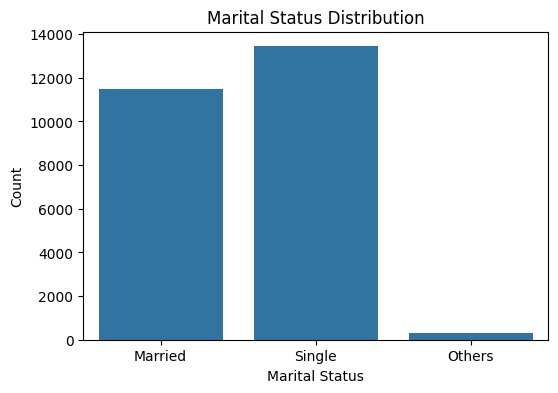

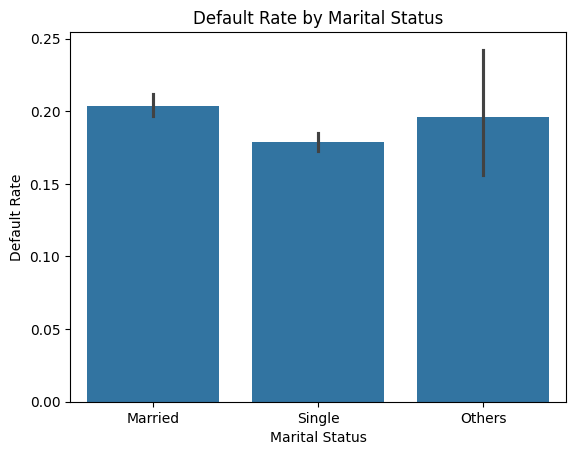

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='marriage_cleaned', data=credit_data, order=['Married', 'Single', 'Others'])
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()
# Insight: Most customers are either married or single. 'Others' is a small group.

sns.barplot(x='marriage_cleaned', y='next_month_default', data=credit_data, order=['Married', 'Single', 'Others'])
plt.title("Default Rate by Marital Status")
plt.ylabel("Default Rate")
plt.xlabel("Marital Status")
plt.show()
# Insight: Married individuals have a slightly higher default rate (~20%) compared to Single individuals (~18%)
           #The others" also has similar risk level as Married,but wider confidence interval

In [21]:
credit_data['sex'].value_counts()

sex
1.0    15252
0.0     9995
Name: count, dtype: int64

In [22]:
# Clean and visualize 'sex' feature
credit_data['sex_cleaned'] = credit_data['sex'].map({1: 'Male', 0: 'Female'})



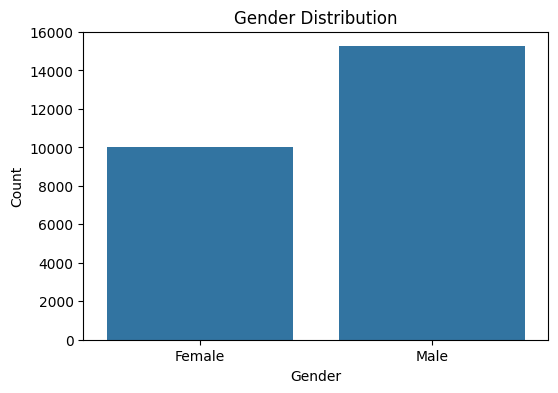

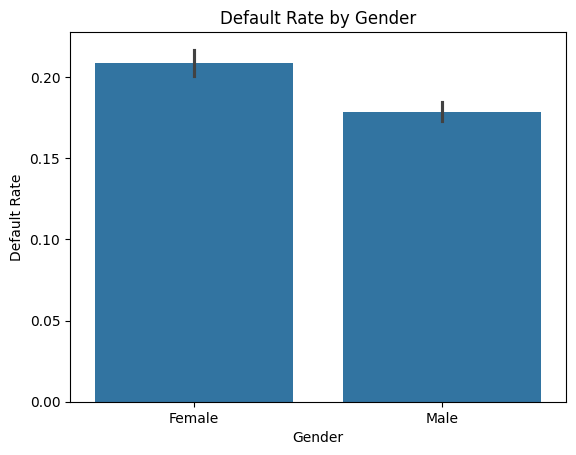

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex_cleaned', data=credit_data)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
# Insight: The dataset contains more male customers than female

sns.barplot(x='sex_cleaned', y='next_month_default', data=credit_data)
plt.title("Default Rate by Gender")
plt.ylabel("Default Rate")
plt.xlabel("Gender")
plt.show()
# Insight: Females show a higher default rate (~21%) compared to males (~18%), despite being fewer in number.

In [24]:
credit_data['education'].value_counts()

education
2.0    11717
1.0     8988
3.0     4115
5.0      253
4.0      116
6.0       44
0.0       14
Name: count, dtype: int64

In [25]:
credit_data['education_cleaned'] = credit_data['education'].replace({0: 4, 5: 4, 6: 4})
credit_data['education_cleaned'] = credit_data['education_cleaned'].map({
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
})



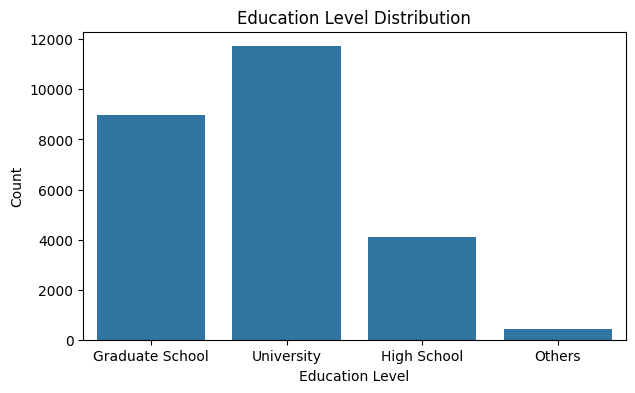

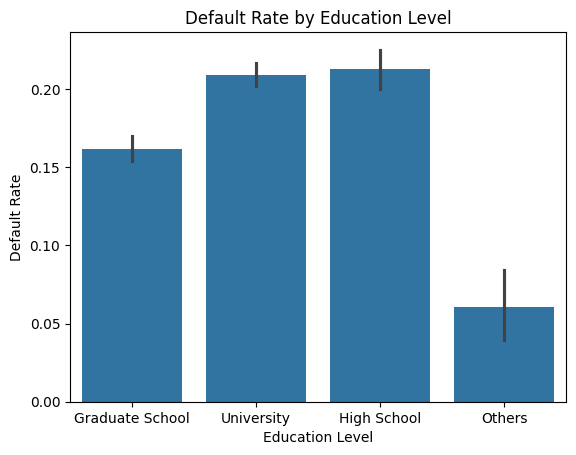

In [26]:

plt.figure(figsize=(7, 4))
sns.countplot(x='education_cleaned', data=credit_data, order=['Graduate School', 'University', 'High School', 'Others'])
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()
#Insight: Most customers have a University (Level 2) or Graduate School (Level 1) background.

sns.barplot(x='education_cleaned', y='next_month_default', data=credit_data, order=['Graduate School', 'University', 'High School', 'Others'])
plt.title("Default Rate by Education Level")
plt.ylabel("Default Rate")
plt.xlabel("Education Level")
plt.show()
#Insight: University and High School groups show higher default rates (~21%).

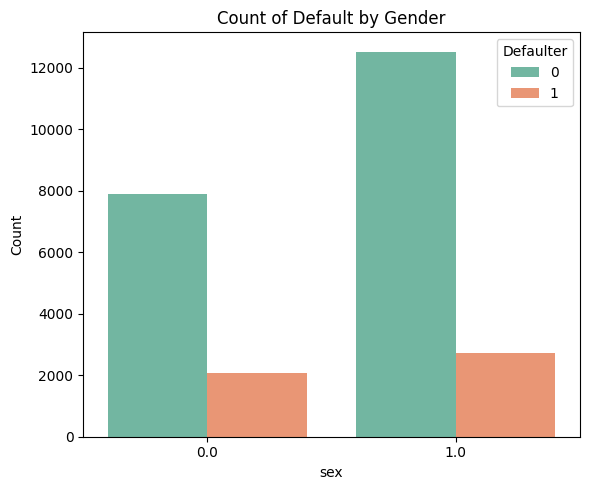

In [27]:
plt.figure(figsize=(6, 5))
sns.countplot(data=credit_data, x='sex', hue='next_month_default', palette='Set2')

# Customize the legend and labels
plt.title('Count of Default by Gender')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='Defaulter', labels=['0', '1'])  # 0 = No Default, 1 = Default
plt.tight_layout()
plt.show()
#Insight: While more males default in total, females have a slightly higher default rate.

In [28]:
credit_data['LIMIT_BAL'].max()

np.float64(1000000.0)

In [29]:
credit_data['LIMIT_BAL'].min()


np.float64(10000.0)

In [30]:
credit_data['LIMIT_BAL'].describe()


count      25247.000000
mean      168342.060443
std       129892.784807
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

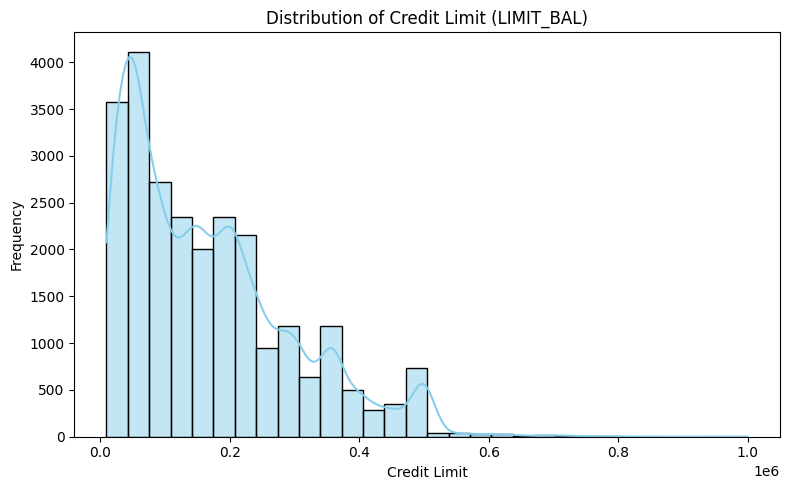

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(credit_data['LIMIT_BAL'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Credit Limit (LIMIT_BAL)')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
#Insight: Most customers have low to moderate credit limits, with a sharp drop in frequency as limits increase, indicating a right-skewed distribution.

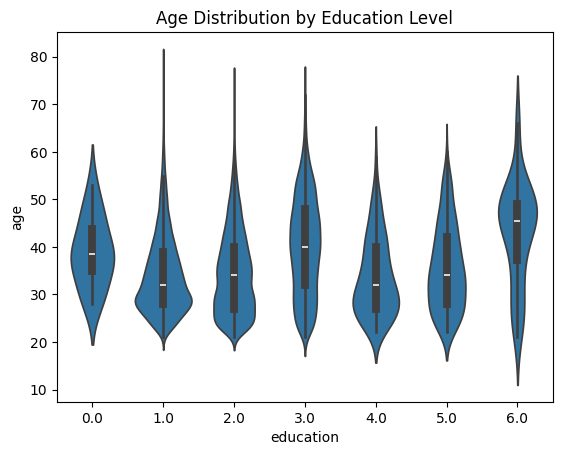

In [32]:
sns.violinplot(x='education', y='age', data=credit_data)
plt.title("Age Distribution by Education Level")
plt.show()
#Insight : Age distribution varies across education levels, with higher education levels generally associated with older age groups and greater spread.

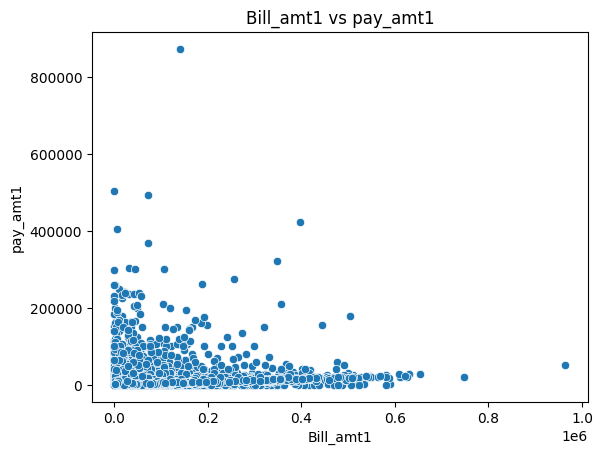

In [33]:
sns.scatterplot(x='Bill_amt1', y='pay_amt1', data=credit_data)
plt.title("Bill_amt1 vs pay_amt1")
plt.show()

#Insight: There is a weak positive relationship between billed amount and payment, with many customers paying less than their total bill.

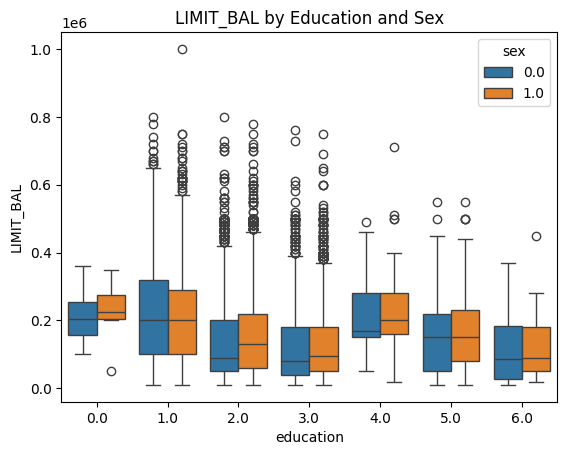

In [34]:
sns.boxplot(x='education', y='LIMIT_BAL', hue='sex', data=credit_data)
plt.title("LIMIT_BAL by Education and Sex")
plt.show()
#Insight: Credit limits (LIMIT_BAL) generally decrease with lower education levels, and males (sex=1.0) tend to have slightly higher limits than females across most education categories.

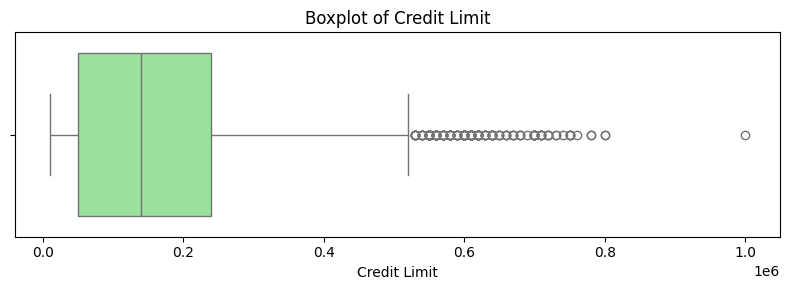

In [35]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=credit_data['LIMIT_BAL'], color='lightgreen')
plt.title('Boxplot of Credit Limit')
plt.xlabel('Credit Limit')
plt.tight_layout()
plt.show()

#Insight: The credit limit distribution is right-skewed with many outliers, indicating that while most customers have moderate limits, a few have extremely high credit limits.

<Axes: xlabel='next_month_default', ylabel='LIMIT_BAL'>

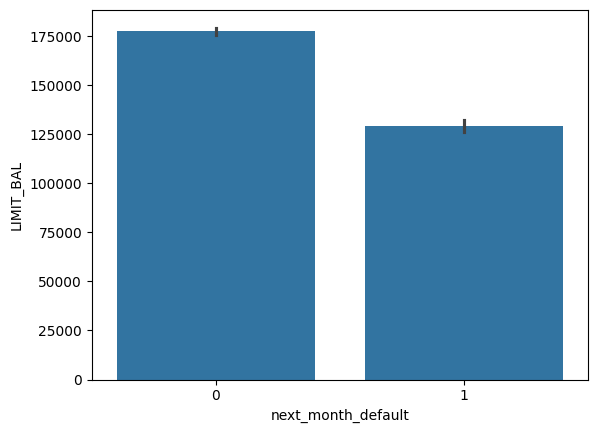

In [36]:
sns.barplot(x='next_month_default', y='LIMIT_BAL', data=credit_data)

#Insight: Customers who defaulted next month had significantly lower average credit limits compared to those who did not default.

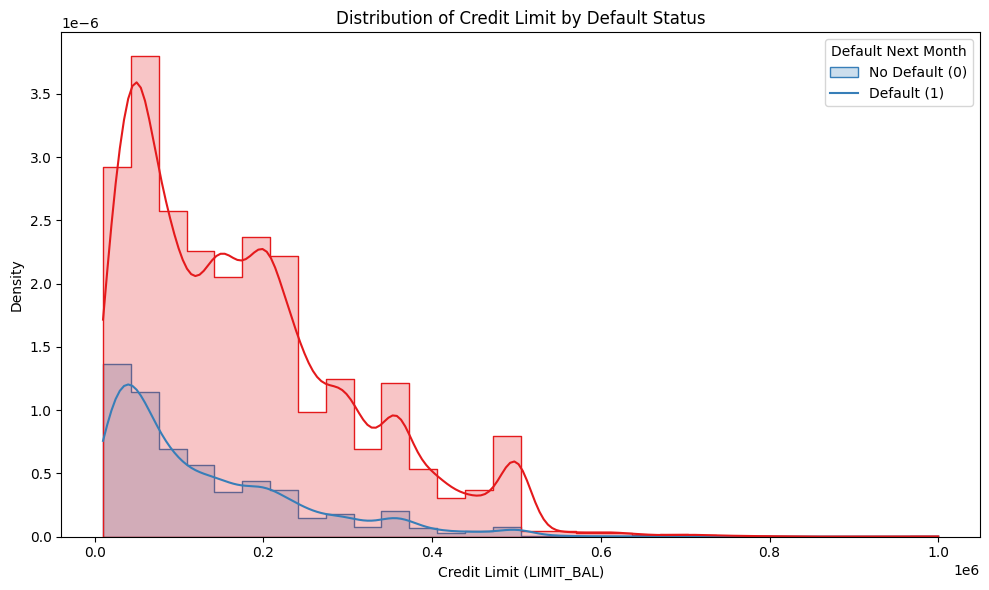

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=credit_data, x='LIMIT_BAL', hue='next_month_default', bins=30, kde=True, palette='Set1', element='step', stat='density')
plt.title('Distribution of Credit Limit by Default Status')
plt.xlabel('Credit Limit (LIMIT_BAL)')
plt.ylabel('Density')
plt.legend(title='Default Next Month', labels=['No Default (0)', 'Default (1)'])
plt.tight_layout()
plt.show()

# Insight: Customers with lower credit limits are more likely to default compared to those with higher credit limits.

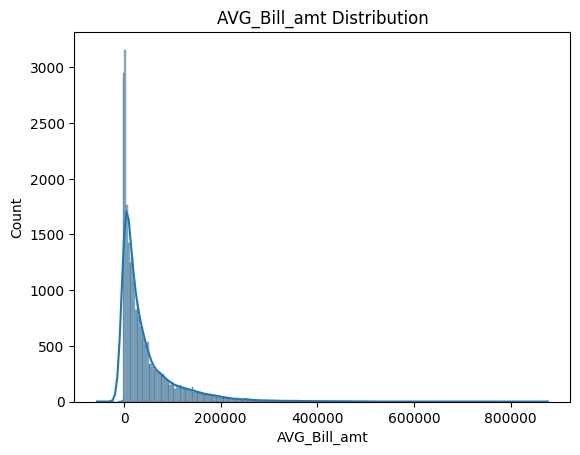

In [38]:
sns.histplot(credit_data['AVG_Bill_amt'], kde=True)
plt.title('AVG_Bill_amt Distribution')
plt.show()

#Insight: The distribution of average bill amount is highly right-skewed, with most customers having low to moderate bills and a few with very high outstanding amounts.

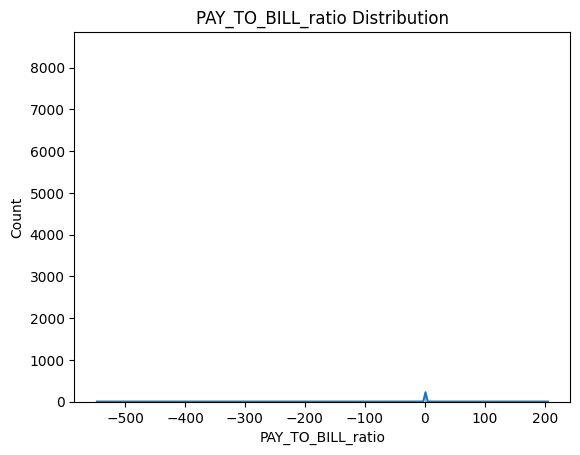

In [39]:
sns.histplot(credit_data['PAY_TO_BILL_ratio'], kde=True)
plt.title('PAY_TO_BILL_ratio Distribution')
plt.show()

#Insight: The PAY_TO_BILL ratio distribution is highly skewed with extreme outliers, indicating inconsistent or potentially erroneous payment behaviors relative to billed amounts.

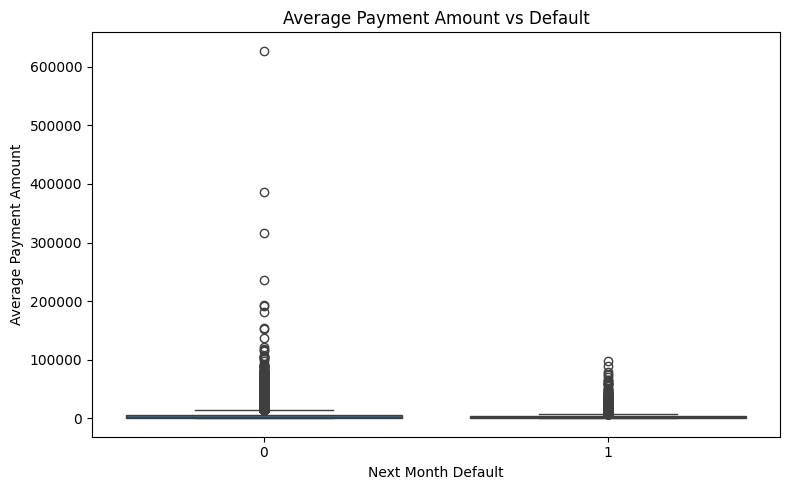

In [40]:
# 1. Average Pay Amount vs Default
plt.figure(figsize=(8, 5))
sns.boxplot(x='next_month_default', y='avg_pay_amt', data=credit_data)
plt.title('Average Payment Amount vs Default')
plt.xlabel('Next Month Default')
plt.ylabel('Average Payment Amount')
plt.tight_layout()
plt.show()

#Insight: Defaulters generally have lower average payment amounts compared to non-defaulters, indicating weaker repayment behavior.

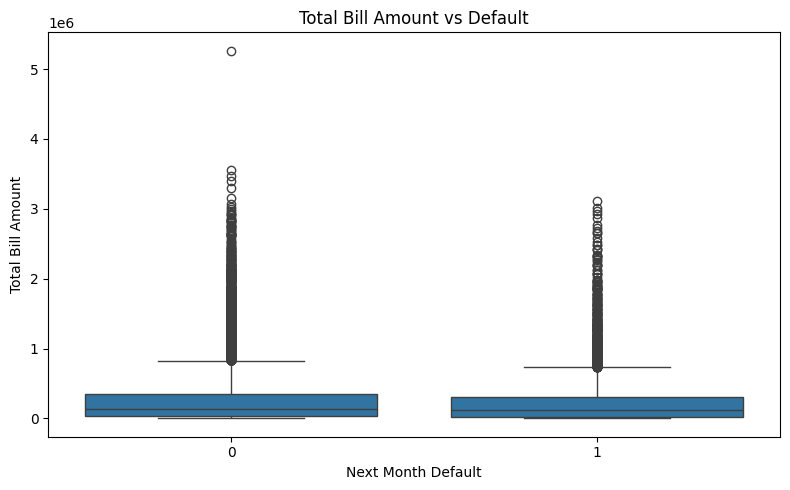

In [41]:
# 2. Total Bill vs Default
plt.figure(figsize=(8, 5))
sns.boxplot(x='next_month_default', y='total_Bill', data=credit_data)
plt.title('Total Bill Amount vs Default')
plt.xlabel('Next Month Default')
plt.ylabel('Total Bill Amount')
plt.tight_layout()
plt.show()

#Insight: Defaulters tend to have slightly lower total bill amounts on average compared to non-defaulters, though the overall distribution is similar.

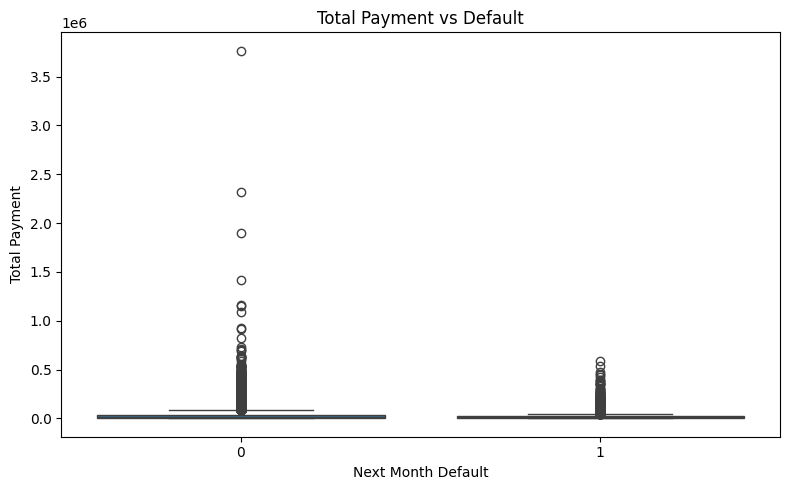

In [42]:
# 3. Total Pay vs Default
plt.figure(figsize=(8, 5))
sns.boxplot(x='next_month_default', y='total_pay', data=credit_data)
plt.title('Total Payment vs Default')
plt.xlabel('Next Month Default')
plt.ylabel('Total Payment')
plt.tight_layout()
plt.show()

#Insight: Defaulters generally make lower total payments compared to non-defaulters, indicating weaker repayment capacity.

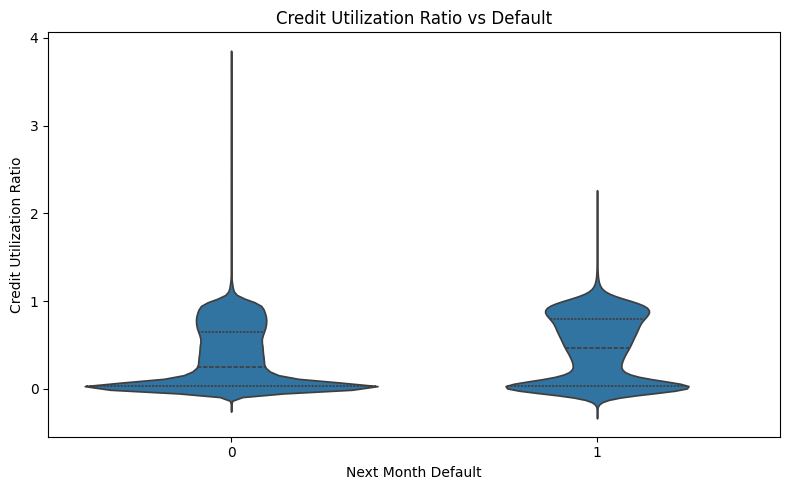

In [43]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='next_month_default', y='credit_utilization_ratio', data=credit_data, inner='quartile')
plt.title('Credit Utilization Ratio vs Default')
plt.xlabel('Next Month Default')
plt.ylabel('Credit Utilization Ratio')
plt.tight_layout()
plt.show()

#Insight: Defaulters tend to have a higher credit utilization ratio, indicating heavier reliance on their credit limits.

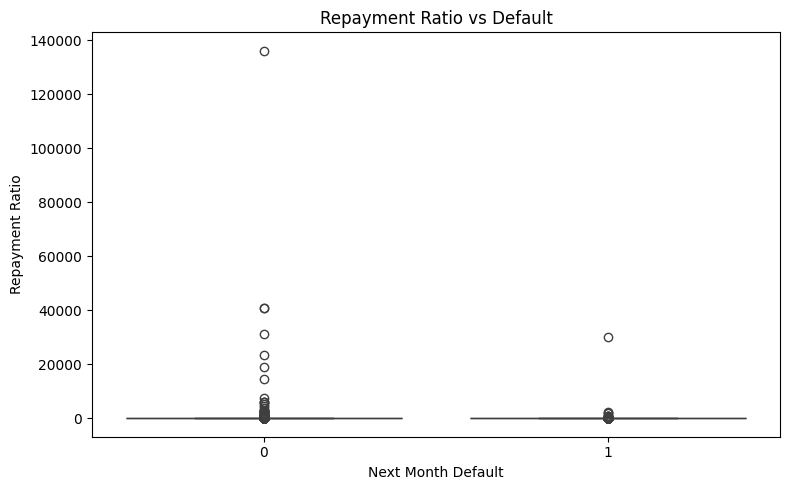

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='next_month_default', y='repayment_ratio', data=credit_data)
plt.title('Repayment Ratio vs Default')
plt.xlabel('Next Month Default')
plt.ylabel('Repayment Ratio')
plt.tight_layout()
plt.show()

#Insight : Defaulters generally exhibit lower repayment ratios compared to non-defaulters, indicating poorer bill payment behavior.

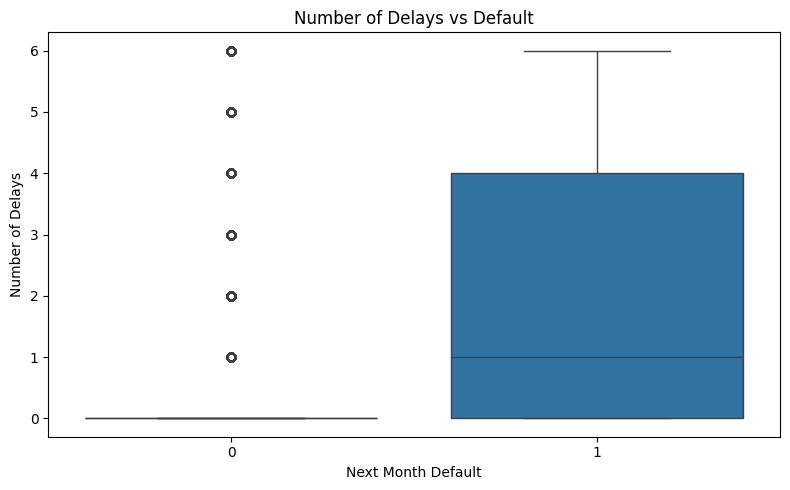

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='next_month_default', y='num_delays', data=credit_data)
plt.title('Number of Delays vs Default')
plt.xlabel('Next Month Default')
plt.ylabel('Number of Delays')
plt.tight_layout()
plt.show()

#Insight: Defaulters generally have a higher number of delayed payments compared to non-defaulters.

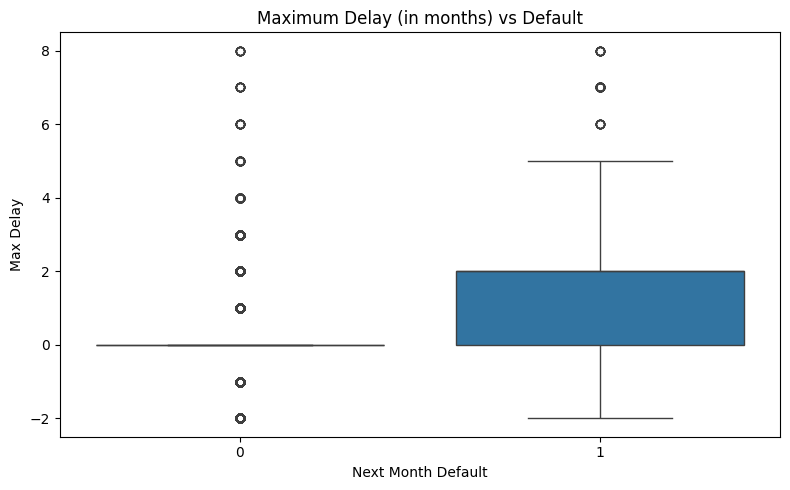

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='next_month_default', y='max_delay', data=credit_data)
plt.title('Maximum Delay (in months) vs Default')
plt.xlabel('Next Month Default')
plt.ylabel('Max Delay')
plt.tight_layout()
plt.show()
# Insight: Customers who defaulted next month tend to have a higher maximum delay in past payments compared to those who did not default.

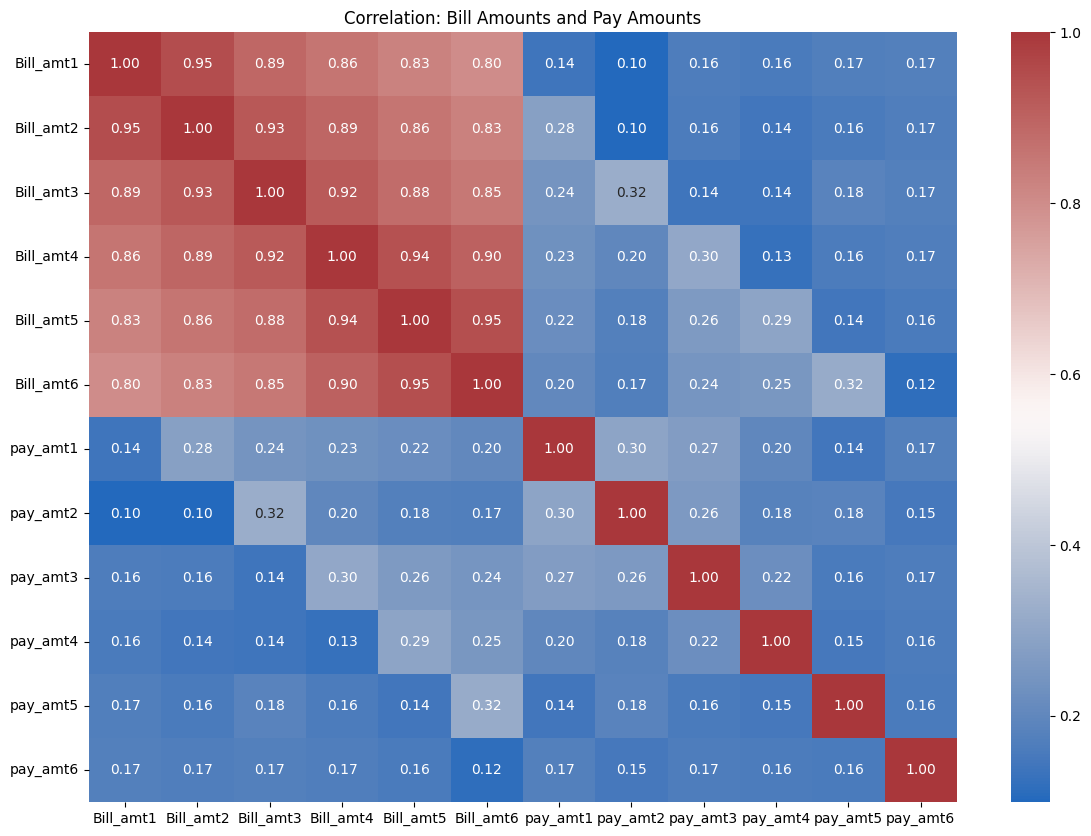

In [47]:
bill_pay_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
                 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

plt.figure(figsize=(14, 10))
sns.heatmap(credit_data[bill_pay_cols].corr(), annot=True, cmap='vlag', fmt=".2f")
plt.title("Correlation: Bill Amounts and Pay Amounts")
plt.show()

#Insight:  bill amounts are strongly correlated across months, while payment amounts show low correlation with both bill amounts

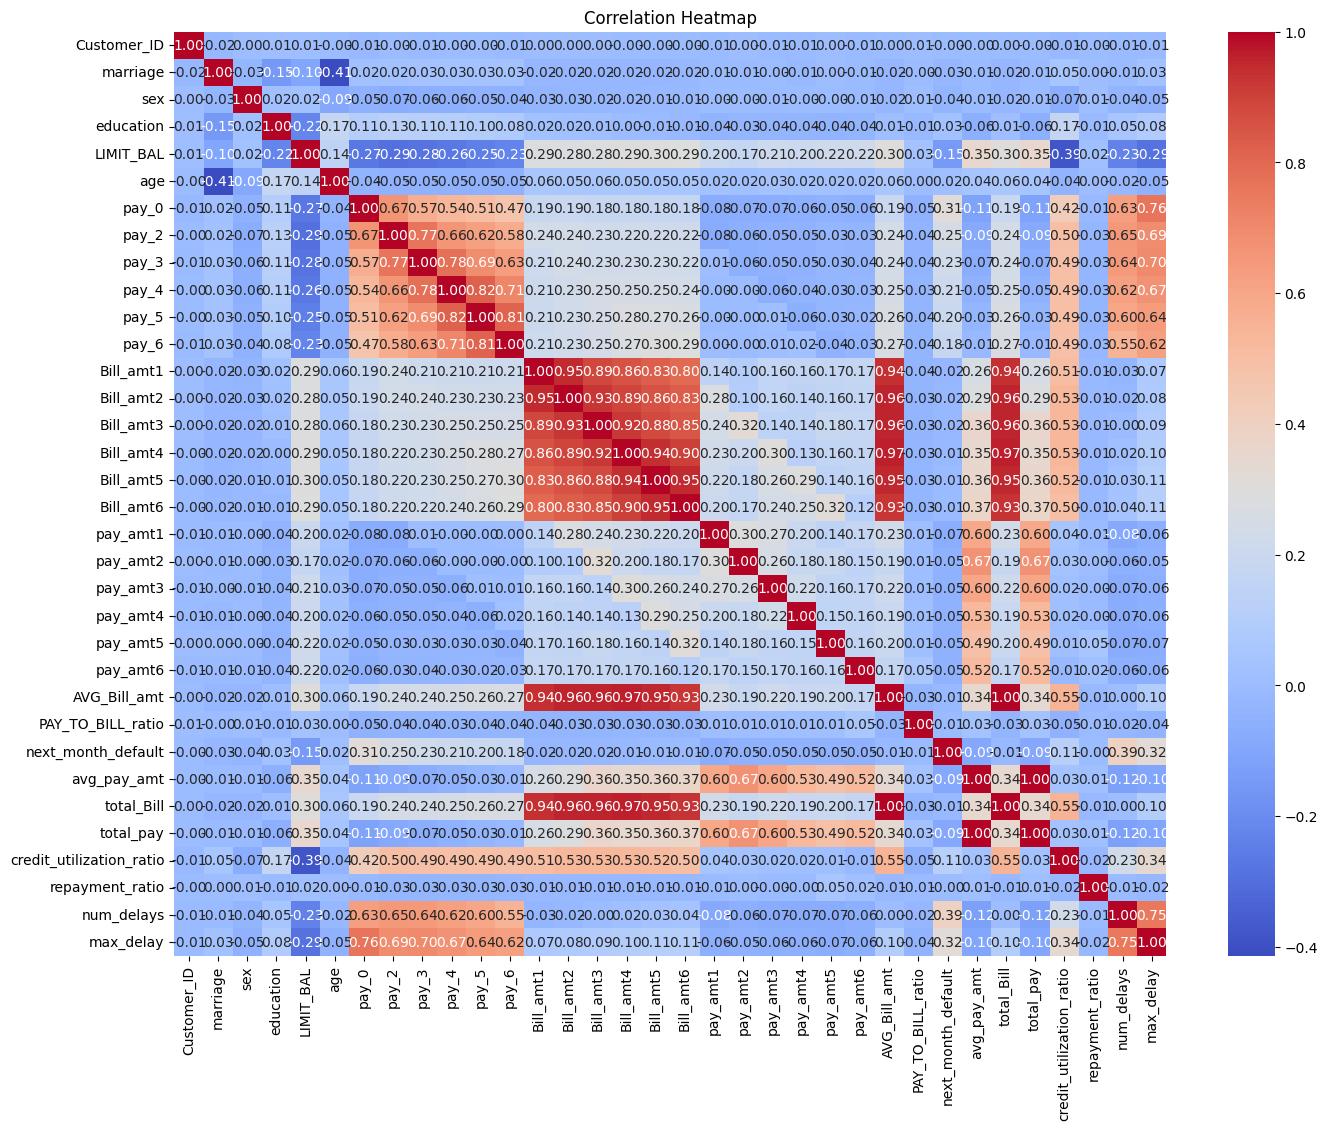

In [48]:
plt.figure(figsize=(16, 12))
sns.heatmap(credit_data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


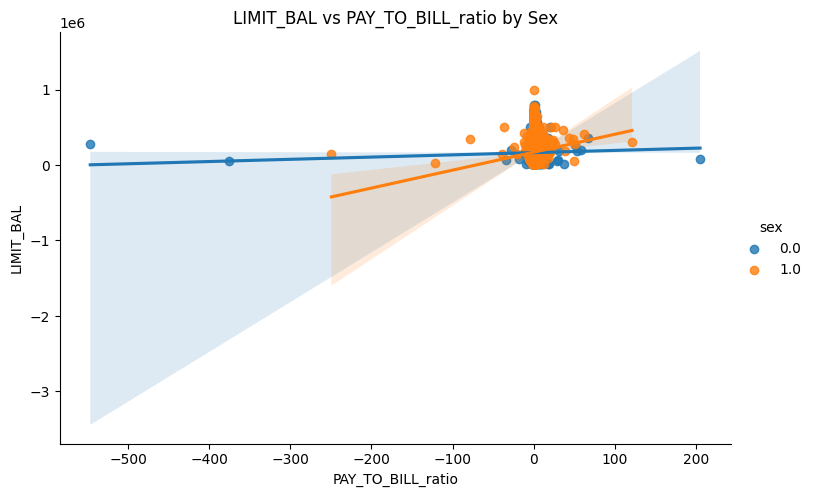

In [49]:
sns.lmplot(x='PAY_TO_BILL_ratio', y='LIMIT_BAL', hue='sex', data=credit_data, aspect=1.5)
plt.title("LIMIT_BAL vs PAY_TO_BILL_ratio by Sex")
plt.show()

#Insight: There is a slightly positive relationship between PAY_TO_BILL_ratio and LIMIT_BAL, with females (sex=1.0) showing a steeper upward trend than males (sex=0.0).

In [50]:
# Define features and target
X = credit_data.drop(columns=['next_month_default', 'Customer_ID'])
y = credit_data['next_month_default']
X_encoded = pd.get_dummies(X, drop_first=True)

In [51]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_encoded, y)

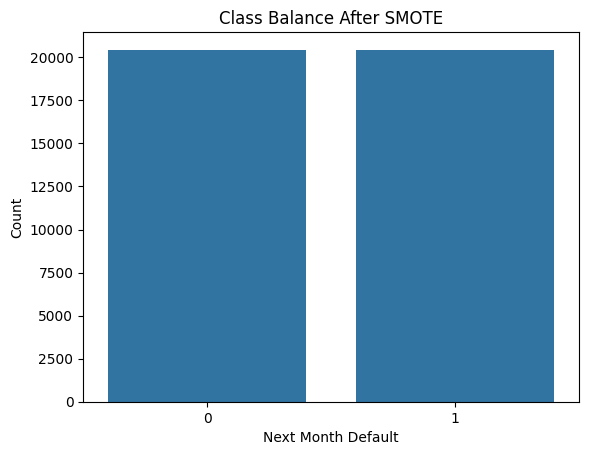

In [52]:
balance_df = pd.DataFrame(X_smote, columns=X_encoded.columns)
balance_df['next_month_default'] = y_smote

# Plot
sns.countplot(x='next_month_default', data=balance_df)
plt.title("Class Balance After SMOTE")
plt.xlabel("Next Month Default")
plt.ylabel("Count")
plt.show()

In [53]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

In [54]:
selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))
X_selected = selector.fit_transform(X_scaled, y_smote)

In [55]:
# Train-Test Split for Logistic Regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_selected, y_smote, test_size=0.2, random_state=42)

In [56]:
# Logistic Regression with hyperparameter tuning
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, scoring='f1', cv=3)
grid_lr.fit(X_train_lr, y_train_lr)
best_lr = grid_lr.best_estimator_

C:\Users\Lakshya Gupta\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lakshya Gupta\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lakshya Gupta\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Lakshya Gupta\AppData

In [57]:
# Find best threshold using F2 score
probs = best_lr.predict_proba(X_test_lr)[:, 1]
f2_scores = []
thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    preds = (probs > t).astype(int)
    f2_scores.append(fbeta_score(y_test_lr, preds, beta=2))

best_threshold = thresholds[np.argmax(f2_scores)]
print("Best threshold for F2:", best_threshold)

Best threshold for F2: 0.20000000000000004


In [58]:
# Final evaluation on Logistic Regression
final_preds = (probs > best_threshold).astype(int)
from sklearn.metrics import roc_auc_score
auc_lr = roc_auc_score(y_test_lr, probs)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test_lr, final_preds))
print("F2 Score:", fbeta_score(y_test_lr, final_preds, beta=2))
print("AUC-ROC:", auc_lr)
print("Classification Report:\n", classification_report(y_test_lr, final_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test_lr, final_preds))

Logistic Regression Results:
Accuracy: 0.7482876712328768
F2 Score: 0.8587333455010039
AUC-ROC: 0.9078677490506402
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.58      0.70      4066
           1       0.69      0.92      0.79      4110

    accuracy                           0.75      8176
   macro avg       0.78      0.75      0.74      8176
weighted avg       0.78      0.75      0.74      8176

Confusion Matrix:
 [[2354 1712]
 [ 346 3764]]


In [59]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

In [61]:
# Decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_prob_dt = dt.predict_proba(X_test)[:, 1]
y_pred_dt = (y_prob_dt > best_threshold).astype(int)
auc_dt = roc_auc_score(y_test, y_prob_dt)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F2 Score:", fbeta_score(y_test, y_pred_dt, beta=2))
print("AUC-ROC:", auc_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Results:
Accuracy: 0.8449119373776908
F2 Score: 0.8507215288611545
AUC-ROC: 0.8449119373776909
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      4088
           1       0.84      0.85      0.85      4088

    accuracy                           0.84      8176
   macro avg       0.85      0.84      0.84      8176
weighted avg       0.85      0.84      0.84      8176

Confusion Matrix:
 [[3418  670]
 [ 598 3490]]


In [62]:
#XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_prob_xgb > best_threshold).astype(int)

auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F2 Score:", fbeta_score(y_test, y_pred_xgb, beta=2))
print("AUC-ROC:", auc_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


C:\Users\Lakshya Gupta\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [04:58:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
Accuracy: 0.8419765166340509
F2 Score: 0.8903296285741427
AUC-ROC: 0.9479451097383971
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      4088
           1       0.80      0.92      0.85      4088

    accuracy                           0.84      8176
   macro avg       0.85      0.84      0.84      8176
weighted avg       0.85      0.84      0.84      8176

Confusion Matrix:
 [[3135  953]
 [ 339 3749]]


In [63]:
#Light GBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]
y_pred_lgbm = (y_prob_lgbm > best_threshold).astype(int)


auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7919
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [64]:
print("LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("F2 Score:", fbeta_score(y_test, y_pred_lgbm, beta=2))
print("AUC-ROC:", auc_lgbm)
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

LightGBM Results:
Accuracy: 0.837206457925636
F2 Score: 0.8935576877629153
AUC-ROC: 0.94958964187101
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      4088
           1       0.79      0.92      0.85      4088

    accuracy                           0.84      8176
   macro avg       0.85      0.84      0.84      8176
weighted avg       0.85      0.84      0.84      8176

Confusion Matrix:
 [[3064 1024]
 [ 307 3781]]


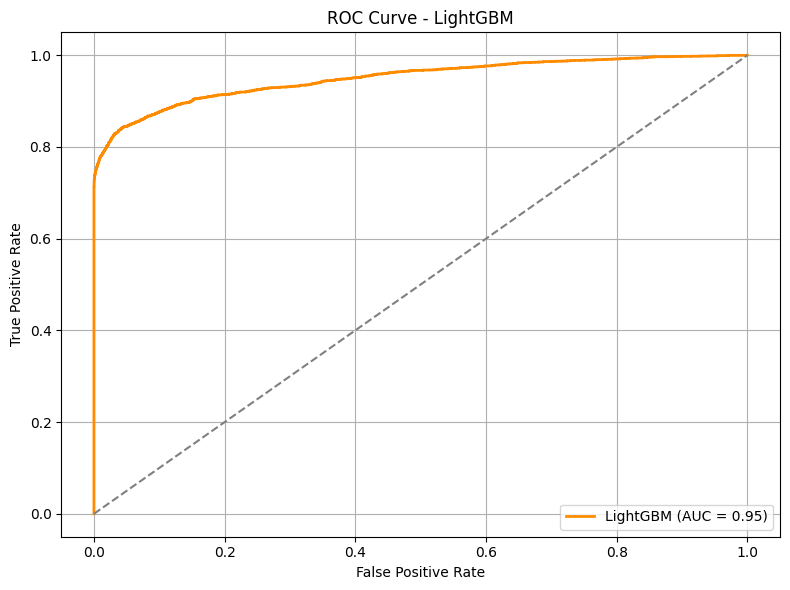

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lgbm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {auc_lgbm:.2f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
val_data = pd.read_csv("validate_dataset_final.csv")

In [67]:
customer_ids = val_data["Customer_ID"]

In [85]:
val_data_imputed = val_data.copy()
val_data_imputed[feature_cols] = knn_imputer.transform(val_data[feature_cols])

In [86]:
X_val = pd.get_dummies(val_data_imputed.drop(columns=["Customer_ID"]), drop_first=True)
X_val = X_val.reindex(columns=X_encoded.columns, fill_value=0)

In [87]:
val_preds = lgbm.predict(X_val)

In [88]:
submission_df = pd.DataFrame({
    "Customer": customer_ids,
    "next_month_default": val_preds
})

In [89]:
submission_df.to_csv('submission_24410015', index=False)

In [90]:
submission_df

,Customer,next_month_default
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
5011,5012,0
5012,5013,0
5013,5014,0
5014,5015,0


In [91]:
from sklearn.metrics import f1_score

train_preds = lgbm.predict(X_train)
test_preds = lgbm.predict(X_test)

print("Train F1:", f1_score(y_train, train_preds))
print("Test F1:", f1_score(y_test, test_preds))



Train F1: 0.9047804371797367
Test F1: 0.8928386092371562


C:\Users\Lakshya Gupta\AppData\Roaming\Python\Python313\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


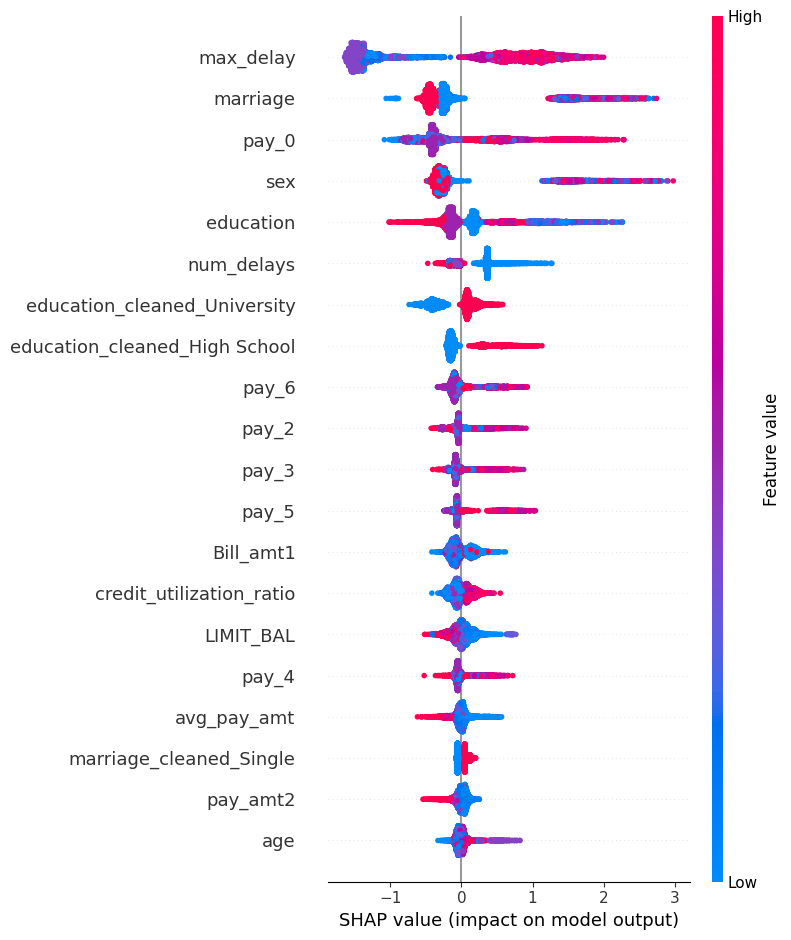

In [70]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

# #Insight:  1. max_delay is the top predictor — higher values strongly increase the chance of delay/default.

#            2.Marital status and gender also impact predictions noticeably.

#            3. Late payments (pay_*) and credit utilization moderately raise risk.

#            4. Higher education tends to lower the predicted risk.